In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('cluster_bank_transactions.csv')

In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df.tail()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0
1048566,T1048567,C8337524,5/3/84,M,PUNE,75734.42,18/9/16,181222,1166.0


- TransactionID 제거
- DOB 나이값으로 변환
- TransactionDate, Time -> Integer값으로 분할
- 요일 변수 추가, 분 및 초 삭제
- 성별 인코딩

- RFM 분석을 진행할 경우, 일 + 시간 단위로 Recency 계산

# 1. Normal Clustering

In [5]:
df_no = df.copy()

In [6]:
df_no.drop('TransactionID', axis = 1, inplace = True)

In [7]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 8 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerID               1048567 non-null  object 
 1   CustomerDOB              1045170 non-null  object 
 2   CustGender               1047467 non-null  object 
 3   CustLocation             1048416 non-null  object 
 4   CustAccountBalance       1046198 non-null  float64
 5   TransactionDate          1048567 non-null  object 
 6   TransactionTime          1048567 non-null  int64  
 7   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [8]:
df_no.dropna(inplace = True)

In [9]:
df_no = df_no.reset_index()

In [10]:
df_no['TransactionDate'] = pd.to_datetime(df_no['TransactionDate'])

In [11]:
max(df_no['TransactionDate'])

Timestamp('2016-12-09 00:00:00')

2016년 12월 10일을 기준으로 계산 진행

In [12]:
len(df_no['CustomerID'].unique())

879358

In [13]:
len(df_no['CustLocation'].unique())

9275

In [14]:
df_no['Age'] = df_no['CustomerDOB']

# 밑에코드 오래걸림 실행 X

In [15]:
from tqdm import trange

In [16]:
for i in trange(len(df_no['CustomerDOB'])):
    df_no['Age'][i] = 116 - int(df_no['CustomerDOB'][i].split('/')[-1])


100%|█████████████████████████████████████████████████████████████████████| 1041614/1041614 [2:12:31<00:00, 131.00it/s]


In [17]:
sorted(df_no['Age'].unique())

[-1684,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116]

In [18]:
indexNames = df_no[df_no['Age'] >= 100].index
indexNames1 = df_no[df_no['Age'] < 0].index
print(df_no['CustomerDOB'][indexNames])
print(df_no['CustomerDOB'][indexNames1])

482         12/7/04
731         13/1/00
3683        9/12/02
5465        2/12/07
5891         4/3/01
             ...   
1038123     11/7/01
1038183     17/7/02
1038692     15/8/05
1039731     11/7/01
1040182    18/11/15
Name: CustomerDOB, Length: 891, dtype: object
16         1/1/1800
22         1/1/1800
28         1/1/1800
34         1/1/1800
150        1/1/1800
             ...   
1041491    1/1/1800
1041500    1/1/1800
1041578    1/1/1800
1041580    1/1/1800
1041587    1/1/1800
Name: CustomerDOB, Length: 56292, dtype: object


In [19]:
for i in indexNames:
    if df_no['Age'][i] > 105:
        df_no['Age'][i] -= 100

In [20]:
df_no.drop(indexNames1, inplace=True)

In [21]:
print(min(df_no['TransactionDate']), max(df_no['TransactionDate']))

2016-01-08 00:00:00 2016-12-09 00:00:00


In [22]:
df_no['AcDate'] = pd.to_datetime('2016-12-10') - df_no['TransactionDate']

In [23]:
df_no['CustomerID'].value_counts()

C3226689    6
C6222360    6
C1736254    6
C1026833    6
C6735477    6
           ..
C4523234    1
C5527974    1
C4428385    1
C3622916    1
C6420483    1
Name: CustomerID, Length: 839081, dtype: int64

In [24]:
df_no[df_no['CustomerID'] == 'C5533885']

,index,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AcDate
28101,28272,C5533885,10/7/90,M,KOLKATA,9283.45,2016-09-25,235351,108.00,26,76 days
49580,49914,C5533885,10/7/90,M,KOLKATA,9283.45,2016-03-08,143820,499.00,26,277 days
306761,308974,C5533885,22/5/88,M,THANE WEST,20845.31,2016-10-08,163930,918.86,28,63 days
477649,481046,C5533885,22/5/88,M,THANE WEST,20845.31,2016-08-21,224421,1180.68,28,111 days
700117,705114,C5533885,28/7/64,M,DELHI,74967.38,2016-08-31,171114,147.00,52,101 days


In [25]:
df_no

,index,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),Age,AcDate
0,0,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,22,306 days
1,1,C2142763,4/4/57,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,59,306 days
2,2,C4417068,26/11/96,F,MUMBAI,17874.44,2016-02-08,142712,459.0,20,306 days
3,3,C5342380,14/9/73,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,43,306 days
4,4,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,28,306 days
...,...,...,...,...,...,...,...,...,...,...,...
1041609,1048562,C8020229,8/4/90,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,26,83 days
1041610,1048563,C6459278,20/2/92,M,NASHIK,27311.42,2016-09-18,183734,460.0,24,83 days
1041611,1048564,C6412354,18/5/89,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,27,83 days
1041612,1048565,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,38,83 days


CustomerID와 CustomerAge로 Groupby한 후 분석 진행

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
lab = LabelEncoder()
lab.fit(df_no.CustGender)

LabelEncoder()

In [28]:
df_no.CustGender = lab.transform(df_no.CustGender)

In [29]:
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 985322 entries, 0 to 1041613
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   index                    985322 non-null  int64          
 1   CustomerID               985322 non-null  object         
 2   CustomerDOB              985322 non-null  object         
 3   CustGender               985322 non-null  int32          
 4   CustLocation             985322 non-null  object         
 5   CustAccountBalance       985322 non-null  float64        
 6   TransactionDate          985322 non-null  datetime64[ns] 
 7   TransactionTime          985322 non-null  int64          
 8   TransactionAmount (INR)  985322 non-null  float64        
 9   Age                      985322 non-null  object         
 10  AcDate                   985322 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4),

In [30]:
aggregation = {
    'TransactionAmount (INR)':'sum',
    'AcDate':'min'
}

In [31]:
df_new = df_no.groupby(['CustomerID','Age','CustGender','CustAccountBalance']).agg(aggregation).reset_index()

In [32]:
df_new

,CustomerID,Age,CustGender,CustAccountBalance,TransactionAmount (INR),AcDate
0,C1010011,24,0,32500.73,4750.0,75 days
1,C1010011,33,1,120180.54,356.0,93 days
2,C1010012,22,1,24204.49,1499.0,118 days
3,C1010014,24,0,38377.14,1205.0,337 days
4,C1010014,32,1,161848.76,250.0,155 days
...,...,...,...,...,...,...
984122,C9099836,26,1,133067.23,691.0,155 days
984123,C9099877,20,1,96063.46,222.0,86 days
984124,C9099919,23,1,5559.75,126.0,114 days
984125,C9099941,21,1,35295.92,50.0,104 days


In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984127 entries, 0 to 984126
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype          
---  ------                   --------------   -----          
 0   CustomerID               984127 non-null  object         
 1   Age                      984127 non-null  int64          
 2   CustGender               984127 non-null  int64          
 3   CustAccountBalance       984127 non-null  float64        
 4   TransactionAmount (INR)  984127 non-null  float64        
 5   AcDate                   984127 non-null  timedelta64[ns]
dtypes: float64(2), int64(2), object(1), timedelta64[ns](1)
memory usage: 45.0+ MB


In [34]:
df_new['AcDate'] = df_new['AcDate'].dt.days

In [35]:
df_new.drop('CustomerID', axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CustGender'}>],
       [<AxesSubplot:title={'center':'CustAccountBalance'}>,
        <AxesSubplot:title={'center':'TransactionAmount (INR)'}>],
       [<AxesSubplot:title={'center':'AcDate'}>, <AxesSubplot:>]],
      dtype=object)

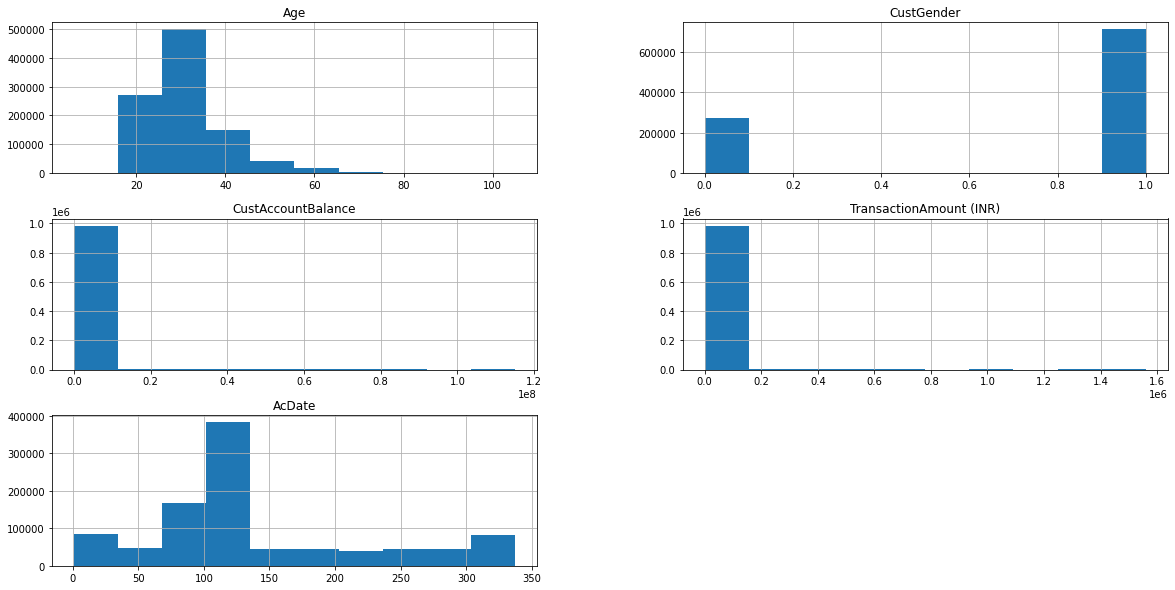

In [36]:
df_new.hist(figsize = (20, 10))

In [37]:
import seaborn as sns

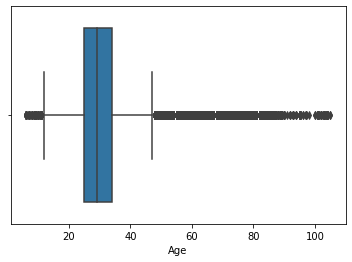

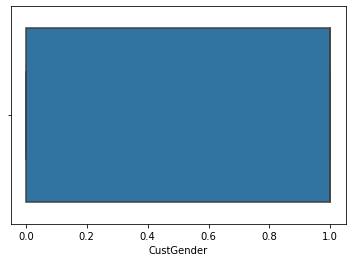

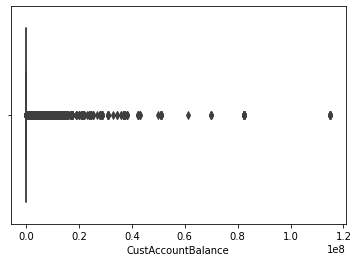

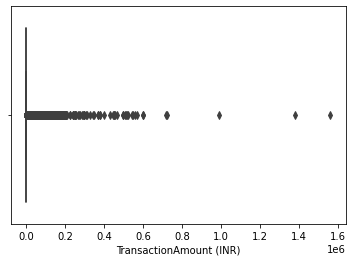

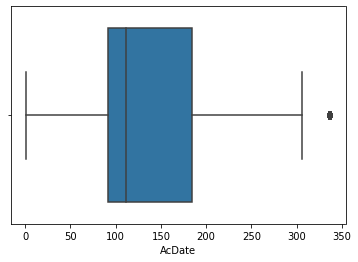

In [38]:
for i in df_new.columns:
    sns.boxplot( df_new[i] )
    plt.show()

In [39]:
df_new.describe(percentiles = [0.01,  0.25, 0.5, 0.75, 0.95, 0.99])

,Age,CustGender,CustAccountBalance,TransactionAmount (INR),AcDate
count,984127.000000,984127.000000,9.841270e+05,9.841270e+05,984127.000000
mean,31.039415,0.723052,1.059916e+05,1.454189e+03,137.302891
std,8.780564,0.447491,8.140840e+05,6.143693e+03,82.517605
min,6.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
1%,19.000000,0.000000,3.470000e+00,8.620000e+00,1.000000
25%,25.000000,0.000000,4.580740e+03,1.520000e+02,92.000000
50%,29.000000,1.000000,1.600194e+04,4.329000e+02,112.000000
75%,34.000000,1.000000,5.375908e+04,1.129000e+03,184.000000
95%,48.000000,1.000000,3.844491e+05,5.000000e+03,306.000000
99%,63.000000,1.000000,1.413420e+06,1.838670e+04,337.000000


In [40]:
def get_outlier(data, col_name, li):
    q1, q3 = np.percentile(data[col_name], [25, 75])
    iqr = q3-q1
    lowest_val = q1 - iqr*1.5
    highest_val = q3 + iqr*1.5

    outlier_index = data[col_name][(data[col_name] < lowest_val) | (data[col_name] > highest_val)].index
    print(col_name, len(outlier_index))
    li.extend(outlier_index)

    return li

li = []
for out in df_new.columns:
    get_outlier(df_new, out, li)

Age 54328
CustGender 0
CustAccountBalance 130514
TransactionAmount (INR) 105500
AcDate 40138


In [41]:
print(len(li), len(set(li)), df_new.shape[0])

330480 268027 984127


In [42]:
df_log = np.log1p(df_new)

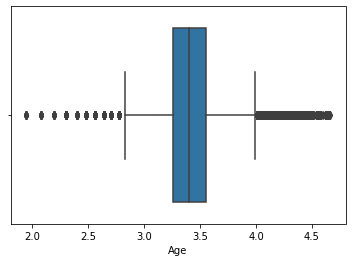

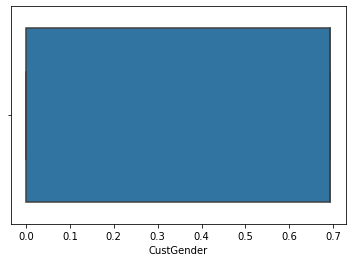

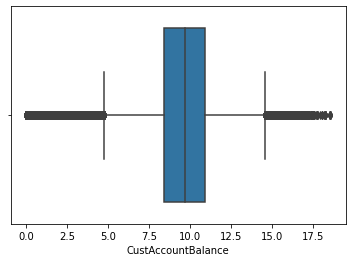

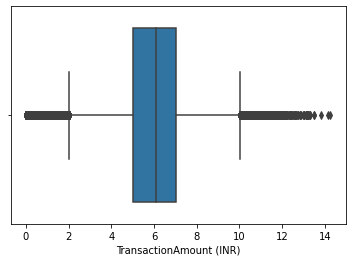

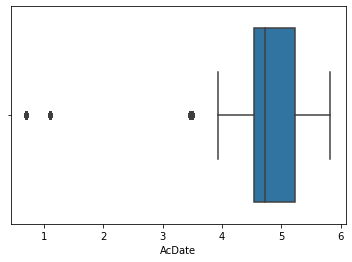

In [43]:
for i in df_new.columns:
    sns.boxplot( df_log[i] )
    plt.show()

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
df_scaled = StandardScaler().fit_transform(df_log)

In [46]:
from sklearn.decomposition import TruncatedSVD

In [47]:
tsvd = TruncatedSVD(n_components = 4)
tsvd.fit(df_scaled)
df_svd = tsvd.transform(df_scaled)

In [48]:
print(sum(tsvd.explained_variance_ratio_), tsvd.explained_variance_ratio_)

0.8580785306939184 [0.30273086 0.20502129 0.19996241 0.15036397]


In [49]:
from sklearn.mixture import GaussianMixture

In [50]:
gmm = GaussianMixture(n_components=4).fit(df_svd)
pred = gmm.predict(df_svd)

In [51]:
pred

array([3, 1, 1, ..., 0, 0, 1], dtype=int64)

In [52]:
pd_svd = pd.DataFrame(df_svd, columns = ['PC1','PC2','PC3','PC4'])

In [53]:
pd_svd['pred'] = pred

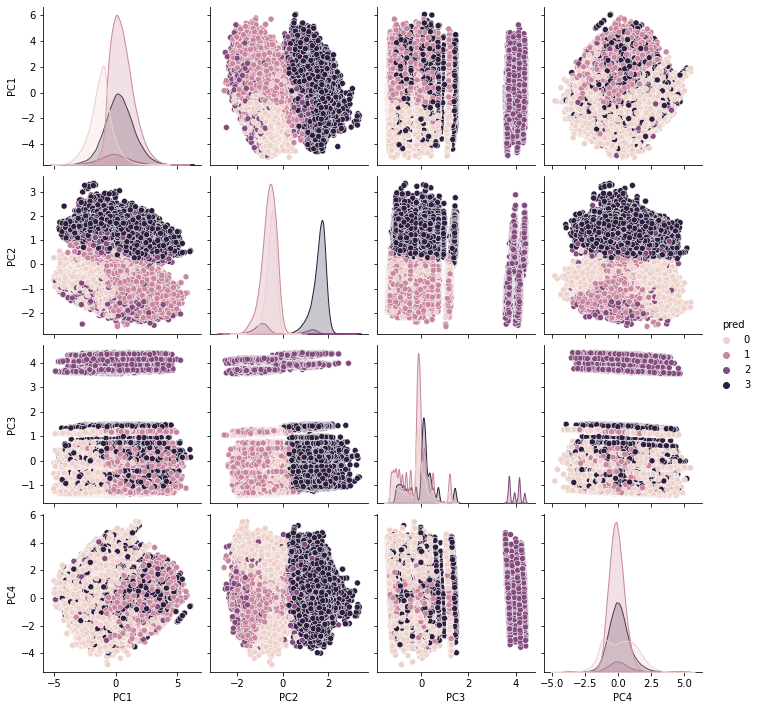

In [54]:
sns.pairplot(pd_svd, hue = 'pred')

In [55]:
pd_svd

,PC1,PC2,PC3,PC4,pred
0,0.795971,1.898918,0.524001,0.636078,3
1,0.628577,-0.660575,0.093241,-0.747725,1
2,-0.127682,-0.098620,-0.165641,0.105151,1
3,0.360363,1.998016,-1.043717,0.009626,3
4,0.508042,-0.576531,-0.435542,-1.006345,1
...,...,...,...,...,...
984122,0.364273,-0.272726,-0.434609,-0.651079,1
984123,-0.728226,-0.058034,0.191474,-1.114414,1
984124,-1.275652,-0.301918,-0.138088,-0.388119,0
984125,-1.388905,-0.188953,-0.014254,-1.364952,0
